In [1]:
import os

In [2]:
cog_data_dir = "/home/ashish/Documents/github/VA/data/cognitive_data"
phy_data_dir = "/home/ashish/Documents/github/VA/data/physical_data"

In [7]:
def get_eeg_filename(eeg_dir):
    for filename in os.listdir(eeg_dir):
        if len(filename.split(".")) == 1:
            # if the file doesn't have any extension
            return filename
        
    return os.listdir(eeg_dir)[0]

In [8]:
session_counter = 0
for user_id in range(1, 10):
    user_dir = os.path.join(cog_data_dir, f"user_{user_id}")
    for session in os.listdir(user_dir):
        session_dir = os.path.join(user_dir, session)
        for block in os.listdir(session_dir):
            # Sanity check if the directory has the name "block" or not
            if "block" not in block or "practice" in block.lower():
                # Ignore directories other than block
                continue
            block_dir = os.path.join(session_dir, block)
            eeg_dir = os.path.join(block_dir, "eeg")
            eeg_filename = get_eeg_filename(eeg_dir)
            eeg_path = os.path.join(block_dir, "eeg", eeg_filename)
            print(
                f"{session_counter+1}. Session: {session[-1]} | User_ID: {user_id} | Session: {session} | Block_dir: {block}"
            )
            session_counter += 1
            break
        break
    break

1. Session: 1 | User_ID: 1 | Session: session_1 | Block_dir: block3_2


In [9]:
def read_eeg_bands(eeg_path):
    bands = {
        'a': [], 'b': [], 'd': [], 'g': [], 't': [],
        'Aa': [], 'Ab': [], 'Ad': [], 'Ag': [], 'At': [],
        'as': [], 'bs': [], 'ds': [], 'gs': [], 'ts': [],
    }
    with open(eeg_path, 'r') as file:
        for line in file.readlines():
            values = line.split()
            if not values:
                continue
                
            if values[0] in bands.keys():
                bands[values[0]].append(list(map(lambda x: float(x), values[1:])))
                
    return bands

In [10]:
def store_bands_to_csv(bands):
    pass

In [11]:
bands = read_eeg_bands(eeg_path)
for band in bands:
    print(f'{band}: {len(bands[band])}')

a: 1751
b: 1751
d: 1751
g: 1751
t: 1751
Aa: 1751
Ab: 1751
Ad: 1751
Ag: 1751
At: 1751
as: 1751
bs: 1751
ds: 1751
gs: 1751
ts: 1751


## Plot these bands separately

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

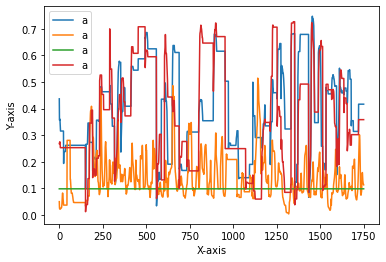

In [13]:
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
x = list(range(len(bands['a'])))
for band in bands:
    plt.plot(x, bands[band], label=band)
    break
    
plt.legend()
plt.show()

In [14]:
eeg_data_file = '/home/ashish/Documents/github/VA/data/cognitive_data/user_3/session_2/block5_2/eeg/3_5_2.csv'

In [15]:
import pandas as pd

In [16]:
X = pd.read_csv(eeg_data_file)
X.head()

,timestep,alpha_1,alpha_2,alpha_3,alpha_4,beta_1,beta_2,beta_3,beta_4,delta_1,...,gamma_4,theta_1,theta_2,theta_3,theta_4,h_1,h_2,h_3,h_4,c
0,1,0.533801,0.152233,0.527005,0.502897,0.085075,0.199896,0.060474,0.083847,0.174264,...,0.017183,0.166593,0.094685,0.143402,0.212845,1.0,1.0,1.0,1.0,0.0
1,2,0.535704,0.159191,0.523280,0.472833,0.082924,0.191909,0.060528,0.087289,0.174450,...,0.017469,0.167085,0.096550,0.144571,0.219618,1.0,1.0,1.0,1.0,0.0
2,3,0.515702,0.160387,0.517091,0.443619,0.085186,0.180666,0.061061,0.088597,0.181282,...,0.017437,0.176282,0.096099,0.147239,0.224494,1.0,1.0,1.0,1.0,0.0
3,4,0.484252,0.152514,0.502802,0.426192,0.090764,0.168153,0.062579,0.085724,0.189963,...,0.017149,0.190862,0.093934,0.151388,0.224120,1.0,1.0,1.0,1.0,0.0
4,5,0.513845,0.144562,0.478873,0.460816,0.088196,0.156288,0.065014,0.075329,0.174497,...,0.015715,0.182362,0.090849,0.155510,0.204213,1.0,1.0,1.0,1.0,0.0


<AxesSubplot:xlabel='timestep'>

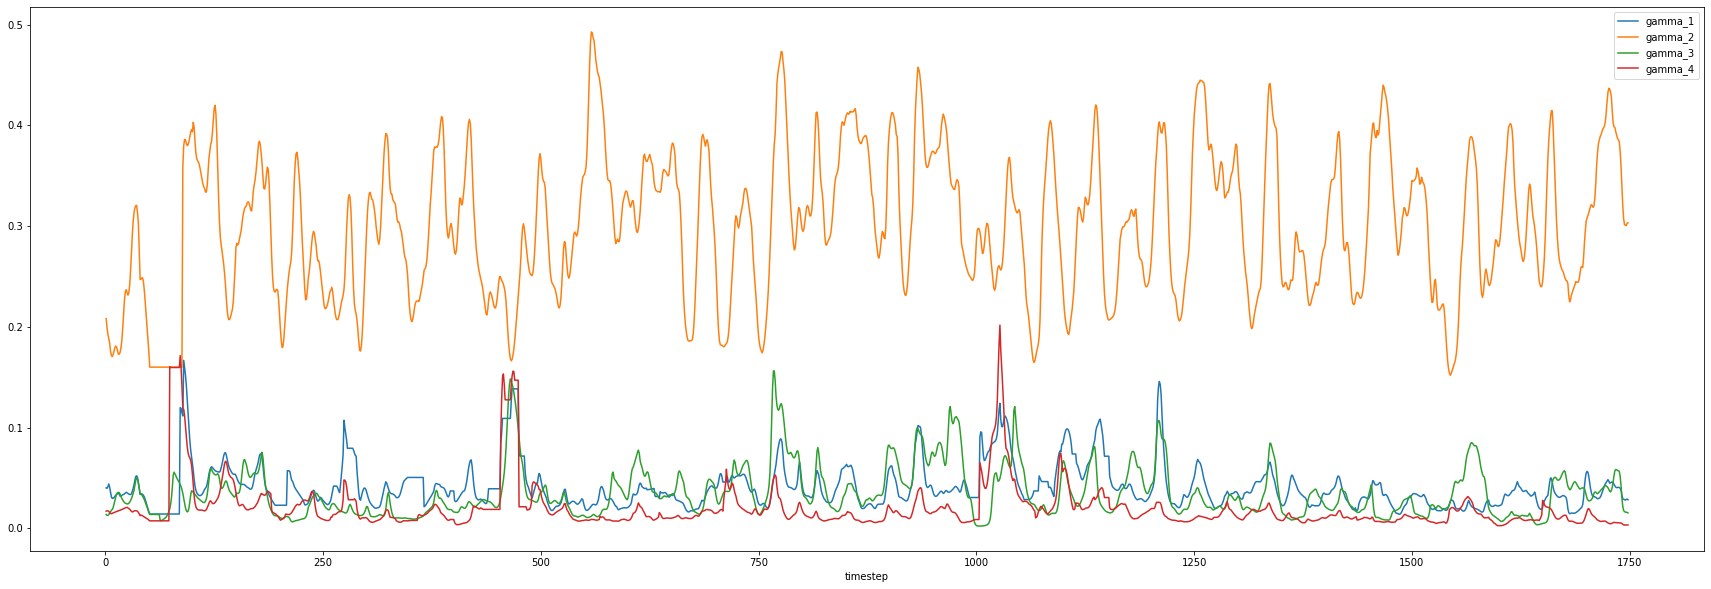

In [25]:
X.plot(x="timestep", y=["gamma_1", "gamma_2", "gamma_3", "gamma_4"], figsize=(30, 10))

# Outlier Detection and Missing Values

### Mixture Model

- The mixture model is a distribution based outlier detection algorithm, where generally, a combination of distributions are used to fit to the data. Each datapoint which is considerably far away from the fitted combination of distributions is considered an outlier. It can be said that the mixture model is a more complex version of Chauvenet’s criterion, which is used in the same manner, but with only one single distribution to fit the data.

- The distributions of a mixture model will be weighted to maximize the product of the probabilities of observing our feature values. The number of distributions is chosen by the user. In this case, we go with the author who used 3 distributions.

- Check outliers.py for more details. For now, we are going to skip removing outliers in our dataset and head straight to `feature engineering` and `ML models`

# Feature Engineering on EEG data

In [18]:
# Here's a data sample
X.head()

,timestep,alpha_1,alpha_2,alpha_3,alpha_4,beta_1,beta_2,beta_3,beta_4,delta_1,...,gamma_4,theta_1,theta_2,theta_3,theta_4,h_1,h_2,h_3,h_4,c
0,1,0.533801,0.152233,0.527005,0.502897,0.085075,0.199896,0.060474,0.083847,0.174264,...,0.017183,0.166593,0.094685,0.143402,0.212845,1.0,1.0,1.0,1.0,0.0
1,2,0.535704,0.159191,0.523280,0.472833,0.082924,0.191909,0.060528,0.087289,0.174450,...,0.017469,0.167085,0.096550,0.144571,0.219618,1.0,1.0,1.0,1.0,0.0
2,3,0.515702,0.160387,0.517091,0.443619,0.085186,0.180666,0.061061,0.088597,0.181282,...,0.017437,0.176282,0.096099,0.147239,0.224494,1.0,1.0,1.0,1.0,0.0
3,4,0.484252,0.152514,0.502802,0.426192,0.090764,0.168153,0.062579,0.085724,0.189963,...,0.017149,0.190862,0.093934,0.151388,0.224120,1.0,1.0,1.0,1.0,0.0
4,5,0.513845,0.144562,0.478873,0.460816,0.088196,0.156288,0.065014,0.075329,0.174497,...,0.015715,0.182362,0.090849,0.155510,0.204213,1.0,1.0,1.0,1.0,0.0


#### For time-domain features
- The idea is to break down the time-series into multiple windows of fixed length and extract one data point for each window
- To summarize the data in each window, we can calculate mean, standard deviation, max, min, and slope (of the line fitting the points)

#### For frequency-domain features
- We compute the amplitudes of the frequencies in each window using a Fourier Transformation (FT)
    1. We will add the frequency with the highest amplitude as an indication of the most important frequency in that window
    2. Also, we can calculate the weighted signal average of the frequencies by multiplying each frequewith their amplitude, take the sum of the results, and then divide this by the sum of the amplitudes
    3. Lastly, we can calculate the power spectral entropy. We compute the power spectral density first (squaring the amplitude and normalizing by the number of found frequencies) , then we normalize the values to a total sum of 1 such that we can view it as a probability density function, and lastly compute the entropy via the standard entropy calculation

In [19]:
import scipy.stats as stats

### Adding temporal features for different windows in the time series

In [30]:
class TemporalFeatures:
    def __init__(self):
        pass
    
    def get_slope(self, window):
        times = np.array(range(0, len(window.index)))
        data = window.astype(np.float32)
        
        # Check for NaNs
        mask = ~np.isnan(data)
        
        # If all points inside the window are NaN, then we return NaN
        if len(data[mask]) == 0:
            return np.nan
        else:
            slope, _, _, _, _ = stats.linregress(times[mask]. data[mask])
            return slope
        
    def aggregate_values(self, df, window_size, aggregation_metric):
        if aggregation_metric == 'mean':
            return df.rolling(window_size).mean()
        elif aggregation_metric == 'max':
            return df.rolling(window_size).max()
        elif aggregation_metric == 'min':
            return df.rolling(window_size).min()
        elif aggregation_metric == 'median':
            return df.rolling(window_size).median()
        elif aggregation_metric == 'std':
            return df.rolling(window_size).std()
        elif aggregation_metric == 'slope':
            return df.rolling(window_size).apply(self.get_slope)
        else:
            return np.nan
        
    def add_temporal_features(self, df, cols, window_size, aggregation_metrics):
        for aggregation_metric in aggregation_metrics:
            for col in cols:
                df[col + '_temp_' + aggregation_metric + '_ws_' + str(window_size)] = self.aggregate_values(df[col], window_size, aggregation_metric)
                
        return df

In [31]:
X.columns

Index(['timestep', 'alpha_1', 'alpha_2', 'alpha_3', 'alpha_4', 'beta_1',
       'beta_2', 'beta_3', 'beta_4', 'delta_1', 'delta_2', 'delta_3',
       'delta_4', 'gamma_1', 'gamma_2', 'gamma_3', 'gamma_4', 'theta_1',
       'theta_2', 'theta_3', 'theta_4', 'h_1', 'h_2', 'h_3', 'h_4', 'c'],
      dtype='object')

In [32]:
selected_cols = list(X.columns)[1:-5]
selected_cols

['alpha_1',
 'alpha_2',
 'alpha_3',
 'alpha_4',
 'beta_1',
 'beta_2',
 'beta_3',
 'beta_4',
 'delta_1',
 'delta_2',
 'delta_3',
 'delta_4',
 'gamma_1',
 'gamma_2',
 'gamma_3',
 'gamma_4',
 'theta_1',
 'theta_2',
 'theta_3',
 'theta_4']

In [ ]:
temp_features = TemporalFeatures()
window_size = 50
X_temp = temp_features.add_temporal_features(X, selected_cols, window_size, ['mean', 'std', 'max', 'min', 'median', 'slope'])